In [40]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Applied Economic Forecasting Using Time Series Methods

In [45]:
from math import sqrt

import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 600)

import statsmodels.formula.api as smf

In [46]:

sim_data = r'https://storage.googleapis.com/applied-economics/simulated_data.csv'

df_sim_data = pd.read_csv(sim_data, header=0, index_col=0, parse_dates=True).reset_index()


In [47]:
df_sim_data.head()

,dummy,e,x,y
0,0,-2.69284,20.78196,-2.69284
1,0,-1.92567,42.74343,50.86232
2,0,0.30370,46.86132,94.96789
3,0,-0.42697,47.94024,119.42788
4,0,-0.23232,28.87548,113.32721


In [48]:
df_sim_data_est = df_sim_data[102:301]
df_sim_data_fore = df_sim_data[302:401]

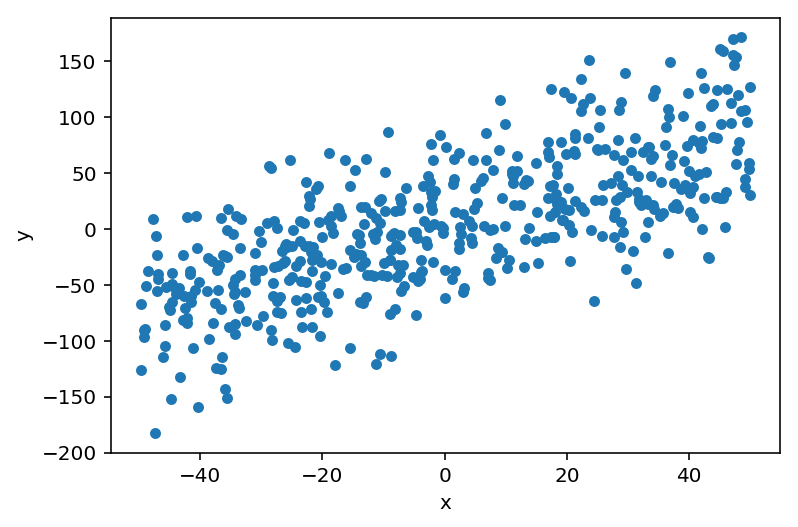

In [49]:

df_sim_data[['x', 'y']].plot.scatter(x='x', y='y')



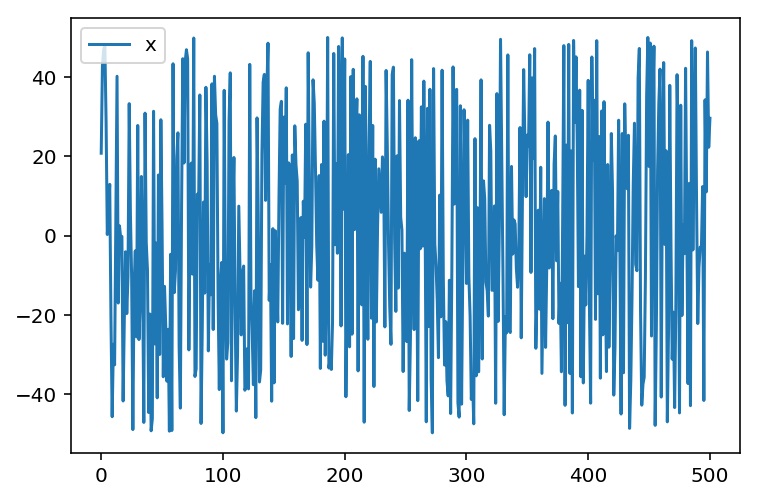

In [50]:
df_sim_data[['x']].plot()


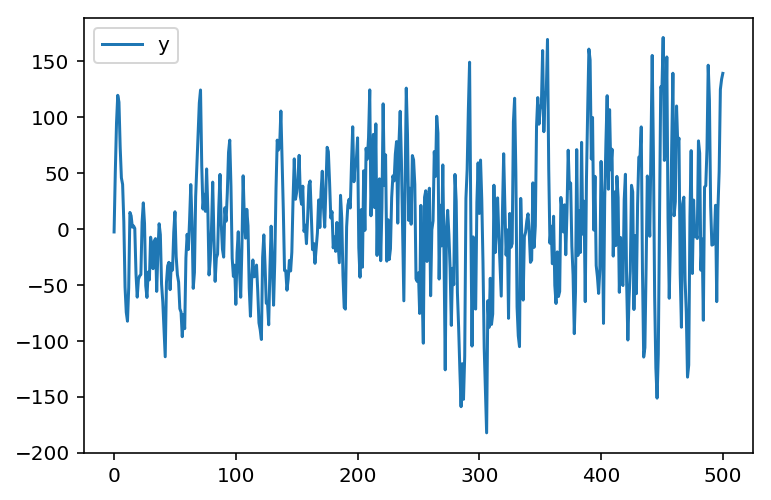

In [51]:
df_sim_data[['y']].plot()


In [52]:
ols_fit = smf.ols(formula='y ~ x', data=df_sim_data_est).fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     199.5
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           9.46e-32
Time:                        23:20:45   Log-Likelihood:                -1013.4
No. Observations:                 199   AIC:                             2031.
Df Residuals:                     197   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7964      2.806      1.353      0.1

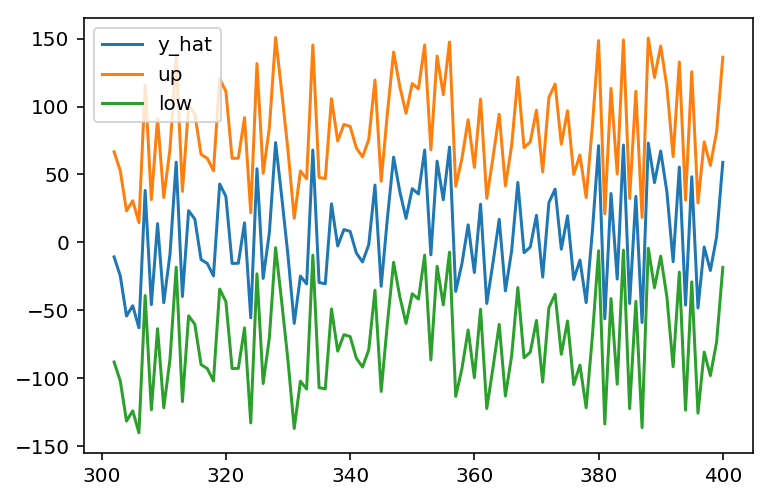

In [53]:

yhat = pd.DataFrame()
yhat['y_hat'] = ols_fit.predict(df_sim_data_fore)
yhat['se'] = sqrt(np.sum(ols_fit.resid ** 2) / 198)
yhat['up'] = yhat['y_hat'] + 1.96 * yhat['se']
yhat['low'] = yhat['y_hat'] - 1.96 * yhat['se']

yhat[['y_hat', 'up', 'low']].plot()

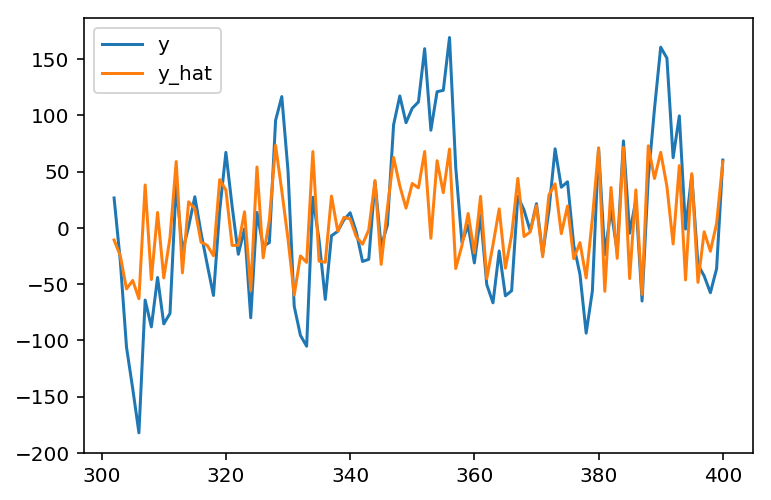

In [54]:

y_plot = pd.concat([df_sim_data_fore[['y']], yhat[['y_hat']]], axis=1)
y_plot.plot()


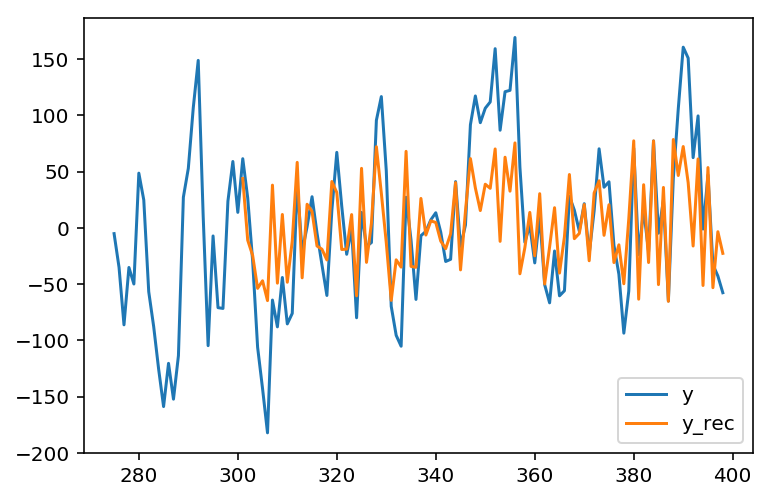

In [55]:
df_rec = pd.DataFrame(index=range(0, 400), columns=['y_rec', 'y_recse'])

for i in range(1, 100):
    ols_rec = smf.ols(formula='y ~ x', data=df_sim_data[101:(300 + i)]).fit()
    df_rec['y_rec'][i + 300] = round(float(ols_rec.predict(df_sim_data[300 + i:(301 + i)])), 6)
    df_rec['y_recse'][i + 300] = sqrt(np.sum(ols_rec.resid ** 2) / 197 + i)

# Plot - actual & recursive forecasts
df_plot = pd.concat([df_sim_data, df_rec], axis=1)
df_plot[275:399][['y', 'y_rec']].plot()


In [56]:
print(ols_rec.summary())
# define likelihood function

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     310.8
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           4.67e-48
Time:                        23:20:47   Log-Likelihood:                -1537.6
No. Observations:                 298   AIC:                             3079.
Df Residuals:                     296   BIC:                             3087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3487      2.449      1.776      0.0


### Element 	        Description
- Dep. Variable 	    Which variable is the response in the model
- Model 	            What model you are using in the fit
- Method 	            How the parameters of the model were calculated
- No. Observations 	The number of observations (examples)
- DF Residuals 	    Degrees of freedom of the residuals. Number of observations - number of parameters
- DF Model 	        Number of parameters in the model (not including the constant term if present)

Element 	        Description
- R-squared 	        The coefficient of determination. A statistical measure of how well the regression line approximates the real data points
- Adj. R-squared 	    The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals
- F-statistic 	    A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals
- Prob (F-statistic) 	The probability that you would get the above statistic, given the null hypothesis that they are unrelated
- Log-likelihood 	    The log of the likelihood function.
- AIC 	            The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
- BIC 	            The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

Description         The name of the term in the model
- coef 	            The estimated value of the coefficient
- std err 	        The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.
- t 	                The t-statistic value. This is a measure of how statistically significant the coefficient is.
- P > |t| 	        P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. [95.0% Conf. Interval]. The lower and upper values of the 95% confidence interval

Element 	        Description
- Skewness 	        A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).
- Kurtosis 	        A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).
- Omnibus 	        D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.
- Prob(Omnibus) 	    The above statistic turned into a probability
- Jarque-Bera 	    A different test of the skewness and kurtosis
- Prob (JB) 	        The above statistic turned into a probability
- Durbin-Watson 	    A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
- Cond. No 	        A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).



### 1.12.1 Forecasting Euro Area GDP ###


In [62]:

ex2_regress_gdp = r'https://storage.googleapis.com/applied-economics/ex2_regress_gdp.csv'
df_eu_gdp_full = pd.read_csv(ex2_regress_gdp, header=0, index_col=0, parse_dates=True).reset_index()



## Full sample - 1996Q1 to 2013Q2



In [66]:

gdp_formula = ['y ~ ipr + su + pr + sr',
               'y ~ ipr + su + sr',
               'y ~ ipr + su',
               'y ~ ipr + pr + sr']

fit = {}
df_fit = pd.DataFrame(index=range(0, 400), columns=['y_rec', 'y_recse'])

for i, model in enumerate(gdp_formula):
    print(model)
    fit[model] = smf.ols(formula=model, data=df_eu_gdp_full).fit()
    print(fit[model].summary())

y ~ ipr + su + pr + sr
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     65.34
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           4.54e-22
Time:                        23:24:48   Log-Likelihood:                -9.8808
No. Observations:                  70   AIC:                             29.76
Df Residuals:                      65   BIC:                             41.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3312      0.

In [71]:
## Estimation sample - 1996Q1 to 2006Q4

df_eu_gdp_est = df_eu_gdp_full[0:44]
df_eu_gdp_fore = df_eu_gdp_full[44:70]

gdp_est = {}

for i, model in enumerate(gdp_formula):
    gdp_est[model] = smf.ols(formula=model, data=df_eu_gdp_est).fit()
    print(gdp_est[model].summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           5.89e-06
Time:                        23:25:23   Log-Likelihood:              -0.018519
No. Observations:                  44   AIC:                             10.04
Df Residuals:                      39   BIC:                             18.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5010      0.082      6.101      0.0

## Static and recursive forecasts

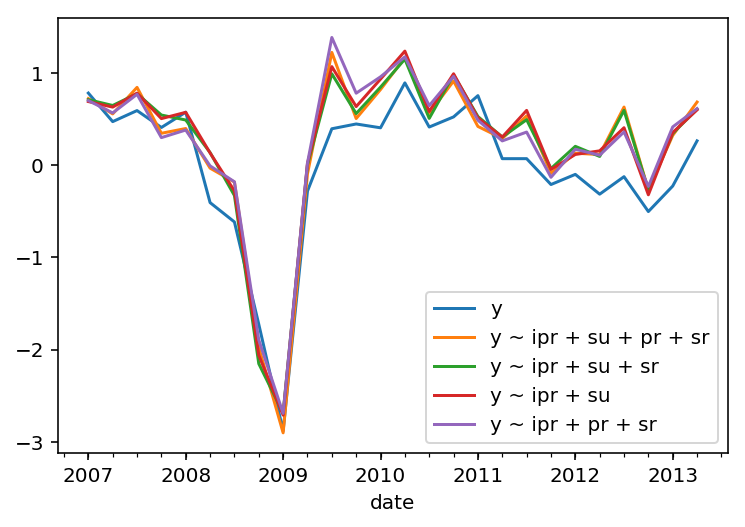

In [73]:

gdp_fore = {}
gdp_rec = {}
df_gdp_rec = pd.DataFrame(index=df_eu_gdp_fore.date, columns=['{}'.format(f) for f in gdp_formula])

for i, model in enumerate(gdp_formula):
    gdp_fore[model] = gdp_est[model].predict(df_eu_gdp_fore)

    gdp_rec[model] = [0] * 26
    for i in range(0, 26):
        ols_rec = smf.ols(formula=model, data=df_eu_gdp_full[0: (44 + i)]).fit()
        df_gdp_rec['{}'.format(model)][df_eu_gdp_full.loc[[44 + i]].date] = float(ols_rec.predict(df_eu_gdp_full.loc[[44 + i]]))

# Plots - actual & forecasts
df_eu_gdp_plot = pd.concat([df_eu_gdp_full.set_index('date'), df_gdp_rec], axis=1)
pred_columns = ['y'] + ['{}'.format(f) for f in gdp_formula]
df_eu_gdp_plot[df_eu_gdp_fore.date.min(): df_eu_gdp_fore.date.max()][pred_columns].plot()


# RMSE & MAE


In [ ]:
df_RMSE = df_gdp_rec.apply(lambda x: sqrt(((x - df_eu_gdp_fore['y'].values) ** 2).sum() / 26))
df_MSE = df_gdp_rec.apply(lambda x: (x - df_eu_gdp_fore['y'].values).abs().sum() / 26)

df_error = pd.concat([df_RMSE, df_MSE], axis=1)
df_error.columns = ['RMSE', 'MSE']
df_error

In [25]:
### 1.12.2 Forecating US GDP ###

In [26]:

ex2_regress_gdp_us = r'https://storage.googleapis.com/applied-economics/ex2_regress_gdp_us.csv'
df_us_gdp_full = pd.read_csv(ex2_regress_gdp_us, header=0, index_col=0, parse_dates=True).reset_index()


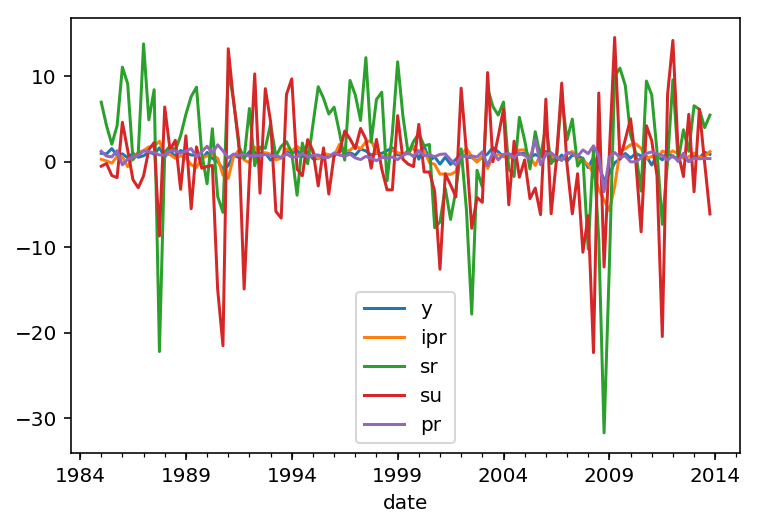

In [28]:

gdp_vars = ['y', 'ipr', 'sr', 'su', 'pr']

df_us_gdp_full[['date'] + gdp_vars].set_index('date').plot()


In [30]:

us_gdp_formula =   ['y ~ ipr + su + pr + sr','y ~ ipr + su + sr','y ~ ipr + su','y ~ ipr + pr + sr']
# Summary

gdp_fit = {}
gdp_rec = {}
df_us_gdp_rec = pd.DataFrame(index=df_us_gdp_full.date, columns=['{}'.format(f) for f in us_gdp_formula])

for i, model in enumerate(us_gdp_formula):
    gdp_fit[model] = smf.ols(formula=model, data=df_us_gdp_full).fit()
    print(gdp_fit[model].summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     31.73
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           1.29e-17
Time:                        23:14:45   Log-Likelihood:                -60.654
No. Observations:                 116   AIC:                             131.3
Df Residuals:                     111   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4044      0.060      6.786      0.0

## Estimation sample - 1985Q1 to 2006Q4


In [77]:
df_us_gdp_est = df_us_gdp_full[0:88]
df_us_gdp_fore = df_us_gdp_full[88:116]

In [32]:

us_gdp_est = {}

for i, model in enumerate(us_gdp_formula):
    us_gdp_est[model] = smf.ols(formula=model, data=df_us_gdp_est).fit()
    print(us_gdp_est[model].summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     13.10
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           2.59e-08
Time:                        23:15:18   Log-Likelihood:                -40.572
No. Observations:                  88   AIC:                             91.14
Df Residuals:                      83   BIC:                             103.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5789      0.088      6.586      0.0

## Static and recursive forecasts


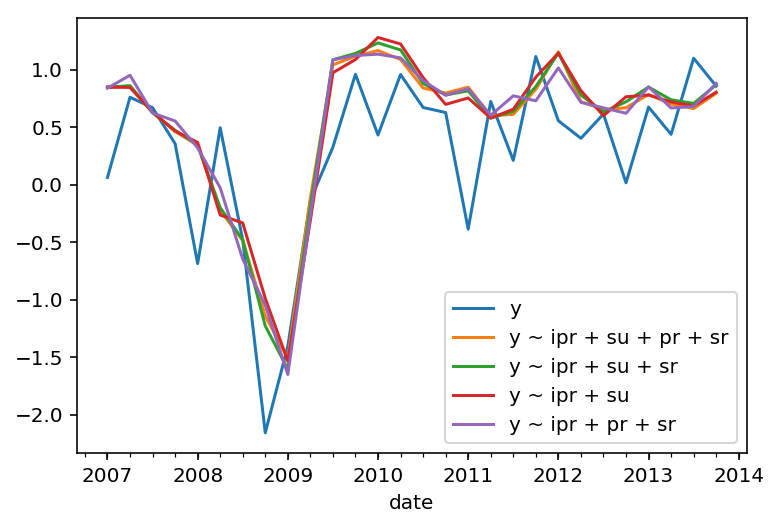

In [82]:

us_gdp_fore = {}
us_gdp_rec = {}
df_us_gdp_rec = pd.DataFrame(index=df_us_gdp_fore.date, columns=['{}'.format(f) for f in us_gdp_formula])

for i, model in enumerate(us_gdp_formula):
    us_gdp_fore[model] = us_gdp_est[model].predict(df_us_gdp_fore)
    us_gdp_rec[model] = [0] * 28
    for i in range(0, 28):
        ols_rec = smf.ols(formula=model, data=df_us_gdp_full[0: (88 + i)]).fit()
        df_us_gdp_rec['{}'.format(model)][df_us_gdp_full.loc[[88 + i]].date] = float(ols_rec.predict(df_us_gdp_full.loc[[88 + i]]))

# Plots - actual & forecasts
df_us_gdp_plot = pd.concat([df_us_gdp_full.set_index('date'), df_us_gdp_rec], axis=1)
pred_columns = ['y'] + ['{}'.format(f) for f in us_gdp_formula]
df_us_gdp_plot[df_us_gdp_fore.date.min(): df_us_gdp_fore.date.max()][pred_columns].plot()

# 1.13.1 Forecasting default risk
- (OAS) Bank of America Merrill Lynch US High Yield Master II Option-Adjusted Spread, denoted OAS, monthly
- (VIX) the Chicago Board Options Exchange (CBOE) Volatility Index, denoted VIX
- (SENT) Surveys of Consumers, University of Michigan, consumer sentiment index, denoted SENT
- (PMI) the ISM Manufacturing: purcahsing managers index, PMI
- (sp500) the monthly returns, in percentage points, of the S&P 500 Index



In [79]:
ex3_regress_oas = r'https://storage.googleapis.com/applied-economics/ex3_regress_oas.csv'
df_oas = pd.read_csv(ex3_regress_oas, header=0, index_col=0, parse_dates=True).reset_index()


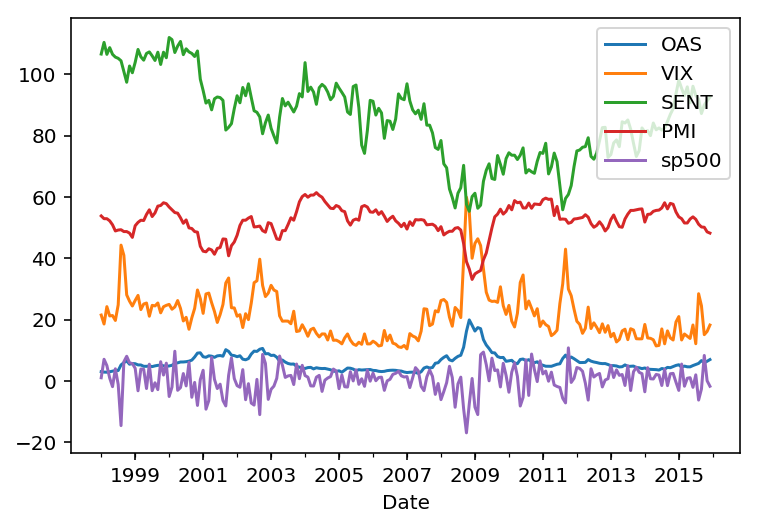

In [35]:
df_oas.set_index("Date").plot()

# shift OAS


In [80]:
df_oas[['OAS']] = df_oas[['OAS']].shift(-1)
df_oas.dropna(inplace=True)

In [37]:
yield_formulas = ['OAS ~ VIX', 'OAS ~ SENT', 'OAS ~ PMI', 'OAS ~ sp500', 'OAS ~ VIX + SENT + PMI + sp500']

yield_fit = {}
df_yield = pd.DataFrame(index=df_oas.Date, columns=['{}'.format(f) for f in yield_formulas])

for i, model in enumerate(yield_formulas):
    yield_fit[model] = smf.ols(formula=model, data=df_oas).fit()
    print(yield_fit[model].summary())


                            OLS Regression Results                            
Dep. Variable:                    OAS   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           1.92e-52
Time:                        23:16:26   Log-Likelihood:                -407.89
No. Observations:                 215   AIC:                             819.8
Df Residuals:                     213   BIC:                             826.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0544      0.310      0.175      0.8